# Déterminer le salaire annuel d’un ingénieur cogniticien
Projet personnel de statistiques M1 IA School 2024 de Victorien Marchand fait par Wilfried RICHARD  
Le rapport est à envoyer en format PDF et est attendu pour le 8 avril 2024 au plus tard.

## Introduction

Un groupe d’étudiants de l’école d’ingénieurs ENISC (École Nationale d’Ingénieurs en Cognitique, à Bordeaux) a mené une enquête par questionnaire à destination d’ancien étudiants pour connaitre ***quels facteurs peuvent influencer le salaire qu’ils gagnent***.
La spécialité d’ingénieur cogniticien est très particulière, seule l’ENISC y forme ***depuis seulement 2003*** et les anciens ingénieurs sont ***peu nombreux*** : il n’existe pas d’autres informations sur cette population. L’échantillon des répondants est considéré comme représentatif de la population des ingénieurs cogniticiens.

### Somaire

<!-- @import "[TOC]" {cmd="toc" depthFrom=1 depthTo=6 orderedList=false} -->
- [Déterminer le salaire annuel d’un ingénieur cogniticien](#d%C3%A9terminer-le-salaire-annuel-dun-ing%C3%A9nieur-cogniticien)
  - [Introduction](#introduction)
    - [Somaire](#somaire)
    - [Objectif](#objectif)
  - [Données](#données)
    - [Import](#import)
    - [Disperssion](#Disperssion)
    - [Dépendence](#dépendence)
  - [Régression](#régression)
    - [Représentation](#représentation)
    - [Distribution](#distribution)
    - [Comparaison](#comparaison)
  - [Conclusion](#conclusion)

### Objectif

Ce rapport ne se résumera pas à une suite de copier-coller de sorties R et devra comprendre une réflexion personnelle sur le problème posé et une conclusion rédigée.
Un rapport expliquant clairement les étapes de votre ***raisonnement***, les ***initiatives*** prises, Les ***statistiques*** descriptives et inférentielles employées pour répondre à la question posée.
***Le but est de savoir si la réussite académique, des facteurs liés à l’entreprise ou personnels jouent sur le salaire***.

## Données

Les variables de la base de données et leur codage sont les suivantes :

1. **promo** : année d’obtention du diplôme d’ingénieur
2. **mention_ecole** : mention obtenue au diplôme d’ingénieur
3. **mention_bac** : mention obtenue au baccalauréat
4. **etudes** : études suivies avant l’entrée dans l’école d’ingénieurs
5. **annees_experience** : nombre d’années d’expérience dans le métier
6. **changements_employeur** : nombre de changements d’employeur au cours de la - carrière
7. **contrat** : type de contrat (CDD ou CDI)
8. **taille_entreprise** : nombre de salariés dans l’entreprise
9. **salaire** : salaire brut annuel (en €)
10. **lieu_travail** : lieu de travail
11. **epanouissement** : à quel point l’ingénieur se sent épanoui dans son travail (Pas du tout / Peu / Oui / Totalement)
12. **sexe** : Homme / Femme
13. **enfants** : avez-vous des enfants
14. **age** : en années
15. **taille** : en cm
16. **poids** : en kg

### Import

In [1]:
path <- "D:\\WyloW2RicardO\\Cours\\Mathematiques\\bdd_regretion_salaire.csv"
path <- "./bdd_regretion_salaire.csv"

In [2]:
#dataset <- read_xlsx(path)
dataset <- read.csv(
    file = path
    #,header = TRUE
    ,dec="," # caracter de separation de decimal
)
#attach(dataset) # Le nom des colonnes deviens des liste corespondant
head(dataset) # montre le debut du tableau

promo,mention_ecole,mention_bac,etudes,annees_experience,changements_employeur,contrat,taille_entreprise,salaire,lieu_travail,epanouissement,sexe,enfants,age,taille,poids
2020,Bien,Sans mention,DUT,1.0,0,CDI,Entre 10 et 249 employés,36000,"Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux",Oui,Homme,Non,26,1.70e+02,57
2020,Bien,Bien,Licence,1.0,0,CDI,Entre 10 et 249 employés,40000,Paris ou son agglomération,Oui,Homme,Non,25,1.66e+02,69
2017,Bien,Bien,Classe préparatoire scientifique,3.0,1,CDI,Entre 10 et 249 employés,36000,"Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux",Totalement,Homme,Non,25,1.00e+19,10000000
2018,Je ne m'en souviens pas,Bien,Classe préparatoire scientifique,2.5,0,CDI,Entre 10 et 249 employés,42000,Autre ville française,Oui,Homme,Non,25,1.68e+02,68
2018,Bien,Très bien,Classe préparatoire littéraire,3.0,1,CDI,Entre 250 et 4999 employés,84000,Hors UE,Oui,Femme,Non,24,1.69e+02,57
2014,Sans mention,Sans mention,Classe préparatoire scientifique,5.0,1 fois,CDI,Plus de 5000 salariés,35000,"Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux",Oui,Homme,Non,32,1.63e+02,67


In [3]:
# cration d'une fonction pour ne pas à avoir à le refaire si néssaisaire
distinct <- function(liste){return(as.character(sort(unique(liste))))}
graphique <- function(
    x
    , y
    ){
        data <- data.frame(x, y)
        plot(data
            #, main = type
            , xlab = names(x)
            , ylab = names(y)
            )
        }
rechercher <- function( # recherche la position des valeur correspondent
        liste               # liste des valeur dans laquelle on doit cherhcer
        , valeurRecherche   # la valeur rechercher dans la liste
    ) {
        listeIndex <- c()
        for (index in 1:length(liste)) { # de 1 à 65
            if (
                    !is.na(liste[index]) 
                    & liste[index] == valeurRecherche
                ) {
                    listeIndex  <- append(
                        x = listeIndex
                        , values = index
                        )
                }
            }
        return(listeIndex) # renvoi une liste des numéro de ligne
    }
position <- function ( # Renvoi les position des valeur corespondante
    liste
    , listeRef
    ) {
        listePos <- c()
        longeurRef <- length(listeRef)
        #print(liste)
        #print(listeRef)
        for (indexListe in seq(length(liste))) {
            indexRef <- 1
            #print(is.character(liste[indexListe]))
            if (grepl("^[0-9]{1,}$", liste[indexListe])) { # pour enchainé texte et numéro
                listePos <- append(listePos, as.numeric(liste[indexListe]))
                } else {
                    #message(paste('debut : ',print(liste[indexListe] != listeRef[indexRef])))
                    while ( # parcour la liste de reference
                        liste[indexListe] != listeRef[indexRef]
                        & indexRef < longeurRef
                        ) {
                            indexRef <- indexRef + 1
                            #message(paste('court : ',liste[indexListe],' != ',listeRef[indexRef],print(liste[indexListe] != listeRef[indexRef])))
                            }
                    if ( # si il y a une erreur d'ecriture
                        indexRef == longeurRef
                        & liste[indexListe] != listeRef[indexRef]
                        ) {
                            message(paste('Les nom sont mal ecrite ; fonction position ', print(liste), print(listeRef)))
                            } else {listePos <- append(listePos, indexRef)}
                    }
            }
        return(listePos)
        }
replacElement <- function( # ramplce tout les valeur avec le meme element 
        listeData    # Liste des données
        , listeModif # Liste à modifier
        , element    # Valeur ou liste
        , ramplace
    ){
        if (missing(listeModif)) {listeModif <- listeData} # si la liste que l'on veut modifier n'est pas la meme
        if (length(element) != length(ramplace)) { # Marche meme si l'element n'est pas une liste
                message(paste('Les listes ne sont pas de la meme longeur'))
            } else {
                listeModif1 <- as.character(listeModif)
                for (index in 1:length(element)) {
                    valeurElement <- if (is.vector(element)){element[index]} else {element}
                    valeuRamplce <- if (is.vector(ramplace)) {ramplace[index]} else {ramplace}
                    #print(valeurElement)
                    #print(listeData)
                    listeIndex <- rechercher(
                        liste = listeData
                        , valeurRecherche = valeurElement
                        )
                    if (length(listeIndex) != 0) {
                        listeModif1 <- replace(
                            x = listeModif1
                            , list = listeIndex
                            , values = valeuRamplce
                            )
                        }
                    }
                }
        return(listeModif1)
    }

overall_p <- function( # Retourne la p-value de summary()
        model
    ) {
        f <- summary(model)$fstatistic
        p <- pf(f[1],f[2],f[3],lower.tail=F)
        attributes(p) <- NULL
        return(p)
    } # https://www.statology.org/r-extract-p-value-from-lm/
equation <- function (resum) { # ecri l'equoition de regression
    #print(resum)
    nomResum <- names(resum)
    #print(nomResum)
    polynome <- paste("Y=",as.integer(resum[[1]]))
    #print(polynome)
    for (index in seq(2,length(nomResum))) {
        polynome <- paste(polynome,"+X_{",nomResum[index],"}*",as.integer(resum[index]))
        }
    return(polynome)
    }
regression <- function(
    affiche = FALSE
    , element # Liste de colonne
    , dataVariable # dataframe des variable explicative
    , data
    , Y = 'salaire'
    ){
        #print(element)
        #print(missing(dataVariable) & !missing(element))
        if (missing(dataVariable) & !missing(element)) {
            dataVariable <- data.frame(data[,element[1]])
            if (length(element) > 1) {
                for (index in element[-1]) { # Implementer les liste
                    dataVariable <- cbind(
                        dataVariable
                        , data[index]
                        )
                    }
                }
            } else {message("il manque les varible dataVariable ou element")}
        #print(tail(dataVariable))
        model <- lm(data[,Y] ~ ., data = dataVariable )
        #message(affiche)
        if (affiche) {
            print(summary(model))
            #print(coef(model))
            }
        return(c(
                BIC(model)
                , overall_p(model)
                #, coef(model)
                , equation(coefficients(model))
                )
            )
        }
afficheModel <- function( # affiche laregretion linéair simple
    data
    , colonne
    , Y = 'salaire'
    ) {
        model <- lm(data[,Y] ~ data[,colonne])
        print(summary(model))
        message(paste('BIC : ', BIC(model)))
        message(paste('p-value : ', overall_p(model)))
        liste <- if (
            is.character(data[,colonne])
        ) {
            as.factor(data[,colonne])
        } else {
            as.numeric(data[,colonne])
        }
        plot(
            x = liste
            , y = data$salaire
            , xlab = names(data)[colonne]
        )
        abline(model)
    }

orderNumeric <- function( # order() ne marche pas dans un cas particulier 
        listeData
    ) {
        dataOrdre <- data.frame( # initialisation
            index = c(1)
            , valeur = c(as.numeric(listeData[1]))
            , ordre = c(1)
            )
    for (indexData in 2:length(listeData)) { # Parcour se qui reste à trier
            indexOrdre <- 1
            nombreLigneOrdre <- nrow(dataOrdre)
            valeurData <- as.numeric(listeData[indexData])
            valeurOrdre <- as.numeric(dataOrdre$valeur[dataOrdre$ordre == indexOrdre])
            #message('debut ', indexData, ' ; ', valeurData, ' > ', valeurOrdre, ' : ', valeurData > valeurOrdre)
            while (valeurData > valeurOrdre) { # trouver sont niveaux
                    indexOrdre <- indexOrdre + 1
                    if (indexOrdre > nombreLigneOrdre) {
                        #message('indexOrdre > nrow(dataOrdre)')
                        break
                        }
                    valeurData <- as.numeric(listeData[indexData])
                    valeurOrdre <- as.numeric(dataOrdre$valeur[dataOrdre$ordre == indexOrdre])
                    #message('cour ', indexOrdre, ' ; ', valeurData, ' > ', valeurOrdre, ' : ', valeurData > valeurOrdre)
                }
            if (indexOrdre <= nombreLigneOrdre) { # reasigner le reste des valeur
                    dataOrdre1 <- dataOrdre[order(dataOrdre$ordre),]
                    for (indexReste in indexOrdre:nombreLigneOrdre) {
                        dataOrdre1$ordre[indexReste] <- dataOrdre1$ordre[indexReste] + 1
                        }
                    dataOrdre <- dataOrdre1[order(dataOrdre1$index),]
                }
            dataOrdre[nombreLigneOrdre + 1,] <- c( # rajout de la nouvel ligne
                indexData
                , as.numeric(listeData[indexData])
                , indexOrdre
                )
        }
    return(dataOrdre$ordre)
    }

afficheRegression <- function( # affiche une table de BIC et p-value
    data
    , colonnes # Liste des colonnes de base
    , eliminer # colonnes que l'on ne veut pas voir
    ) {
        listeBIC <- c()
        listePvalue <- c()
        nomColonnes <- names(data)
        if (missing(colonnes)
            | length(colonnes) == 0
            ) {colonnes <- c()} else {colonnes <- position(
                liste = colonnes
                , listeRef = nomColonnes
                )}
        #print(colonnes)
        if (missing(eliminer)) {eliminer <- c()} else {eliminer <- position(
                liste = eliminer
                , listeRef = nomColonnes
                )}
        eliminer1 <- c(9, colonnes, eliminer)
        #print(eliminer1)
        longeurColonnes <- length(colonnes)
        if (longeurColonnes != 0) { # Initialisation dataframe des variavle
            #print(data[colonnes])
            #dataExplique <- data.frame(data[colonnes[1]])
            dataExplique <- data.frame(data[colonnes[1]])
            if (longeurColonnes > 1) { # Création dataframe des variavle
                for (index in colonnes[-1]) {
                    dataExplique <- cbind(
                        dataExplique
                        , data[index]
                        )
                    }
                }
            }
        sequance <- seq(length(data))[-eliminer1] # ne marche pas si eliminer1 contien du texte
        #print(sequance)
        for (index in sequance) { # Implementer les liste
            couple <- regression(
                data = data
                #, dataVariable = dataExplique1
                , element = append(colonnes, index)
                )
            listeBIC <- append(
                x = listeBIC
                , values = as.numeric(couple[1])
                )
            listePvalue <- append(
                x = listePvalue
                , values = as.numeric(couple[2])
                )
            }
        #print(listeBIC)
        #print(listePvalue)
        listeOrderBIC <- as.numeric(orderNumeric(listeBIC))
        listeOrderPvalue <- as.numeric(orderNumeric(listePvalue))
        listeProd = listeBIC * listePvalue
        df <- data.frame( # Construction tableau final
            index = sequance
            , nam = nomColonnes[-eliminer1]
            , BIC = listeBIC
            , Pvalue = listePvalue
            , prod = listeProd
            , ordreBIC = listeOrderBIC
            , ordrePvalue = listeOrderPvalue
            , ordreProd = as.numeric(orderNumeric(listeProd))
            , prodOrdre = listeOrderBIC * listeOrderPvalue
            )
        return(df)
        #print(df[order(df$prodOrdre),])
        }

In [4]:
# Type de donnée
seqColonne <- seq(length(dataset))
indexNum <- c(1, 5, 6, 9, 14, 15, 16)
indexChar <- seqColonne[-indexNum]
for (index in seqColonne) {
   if (is.element(index, indexNum)) {
      dataset[,index] <- as.numeric(dataset[,index])
      } else {
         dataset[,index] <- as.character(dataset[,index])
         }
   }
dataset1 <- as.data.frame(dataset)

Pour des soucis de présentation, nous renommons les catégories.

In [5]:
colonne <- 2
colnames(dataset1)[colonne] <-'ecole'
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = c("Sans mention", "Je ne m'en souviens pas", "Bien", "Très bien", "Assez bien")
    , ramplace = c("Sans", NA, "B", "TB", "AB")
    )
colonne <- 3
colnames(dataset1)[colonne] <-'bac'
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = c("Sans mention", "Bien", "Très bien", "Assez bien")
    , ramplace = c("Sans", "B", "TB", "AB")
    )
colonne <- 4
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne]  <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c('BTS','CPL','CPS','CPS','DUT','Licence')
    )
colnames(dataset1)[5] <-'exp'
colnames(dataset1)[6] <-'chang'
colonne <- 7
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = "Sans emploi"
    , ramplace = "Sans"
    )
colonne <- 8
colnames(dataset1)[colonne] <-'employers'
Sort <- distinct(dataset1[,colonne])
Sort
length(Sort)
dataset1[colonne]  <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA,'[10;249]','[250;4999]','[0;10]','[5000;+]')
    )
colonne <- 10
colnames(dataset1)[colonne] <-'lieu'
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA, 'UE', 'Autre_ville', 'Hors_UE', 'Grande_ville', 'Capital')
    )
colonne <- 11
colnames(dataset1)[colonne] <-'heureu'
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA, 'OUI', 'NON', 'OUI')
    )
colonne <- 12
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA, 'H', 'F')
    )
head(dataset1)

[1] "BTS"                                                                                           
[2] "Classe préparatoire littéraire"                                                                
[3] "Classe préparatoire scientifique"                                                              
[4] "Classe préparatoire scientifique, La prépa \"intégrée\" était Classe préparatoire scientifique"
[5] "DUT"                                                                                           
[6] "Licence"

[1] ""                           "Entre 10 et 249 employés"  
[3] "Entre 250 et 4999 employés" "Moins de 10 employés"      
[5] "Plus de 5000 salariés"

[1] 5

[1] ""                                                      
[2] "A l'étranger (UE)"                                     
[3] "Autre ville française"                                 
[4] "Hors UE"                                               
[5] "Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux"
[6] "Paris ou son agglomération"

[1] ""           "Oui"        "Peu"        "Totalement"

[1] ""      "Femme" "Homme"

promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
2020,B,Sans,DUT,1.0,1,CDI,[10;249],36000,Grande_ville,OUI,F,Non,26,1.70e+02,5.7e+01
2020,B,B,Licence,1.0,1,CDI,[10;249],40000,Capital,OUI,F,Non,25,1.66e+02,6.9e+01
2017,B,B,CPS,3.0,2,CDI,[10;249],36000,Grande_ville,OUI,F,Non,25,1.00e+19,1.0e+07
2018,NA,B,CPS,2.5,1,CDI,[10;249],42000,Autre_ville,OUI,F,Non,25,1.68e+02,6.8e+01
2018,B,TB,CPL,3.0,2,CDI,[250;4999],84000,Hors_UE,OUI,H,Non,24,1.69e+02,5.7e+01
2014,Sans,Sans,CPS,5.0,3,CDI,[5000;+],35000,Grande_ville,OUI,F,Non,32,1.63e+02,6.7e+01


En remplaçant les catégories on remarque : 
- **études supérieures** ; la catégorie nommé ***'Classe préparatoire scientifique, La prépa "intégrée" était Classe préparatoire scientifique'*** sera considéré comme la catégorie ***'Classe préparatoire scientifique'*** car elles sont équivalentes.
- **Épanouissement** : il y a trop de subjectivité pour être différent d'une relation ***binaire***.

## Recherche

### Préliminaire

On va commencer par ***vérifier*** chaque colonne, si celles-ci correspondent bien aux catégories souhaitées.  
Comme on peut le voir dans la colonne "*chang*" du tableau ci-dessus, à la dernière ligne, la variable est un texte et non numérique.  
Cette dernière a été mise automatiquement  à *"1"* grâce à la mise en forme.

#### Contrat

La question qui a été posée est de déterminer le salaire et non le taux d'***employabilité***. 
De plus, sur les mêmes lignes de données, il ***manque*** la moitié des informations.  
En l'absence d'emploi, les personnes qui ont rempli le sondage n'ont pas pu transcrire les informations concernant l'entreprise, puisqu'elles n'ont pas de travail.  
Elles seront donc **supprimées**. 

In [6]:
#dataset2 <- subset(dataset1, dataset1$contrat != contratSort[1])
indexContratSans <- rechercher(
    dataset1$contrat
    , 'Sans'
    )
dataset1[indexContratSans,]

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
13,2020,B,B,Licence,1.000,1,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
17,2020,NA,TB,CPL,0.001,1,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
41,2017,B,TB,CPS,3.000,4,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
52,2013,NA,B,CPS,7.000,2,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
55,2019,B,TB,CPL,1.000,1,Sans,NA,NA,NA,NA,NA,,NA,NA,NA


In [7]:
indexContratSans <- rechercher(
    dataset1$contrat
    , 'Sans'
    )
dataset2 <- dataset1[-indexContratSans,]

#### Salaire

In [8]:
salaireSort <- distinct(dataset2$salaire)
salaireSort

[1] "40"     "2800"   "2880"   "23000"  "23500"  "24000"  "25000"  "25412" 
 [9] "29232"  "30000"  "30192"  "32000"  "32400"  "32500"  "33000"  "33500" 
[17] "33600"  "34500"  "35000"  "36000"  "38000"  "38600"  "39000"  "40000" 
[25] "40500"  "41000"  "42000"  "42089"  "43000"  "45000"  "46000"  "47000" 
[33] "50000"  "52000"  "52700"  "54000"  "60000"  "73000"  "75000"  "84000" 
[41] "110000"

On peut considérer que tous les salaires inférieurs au SMIC sont des erreurs d'enregistrement.  
Les sommes à quatre chiffres peuvent correspondre à un salaire mensuel au lieu d'un salaire annuel brut.  
Les sommes  à deux chiffres peuvent correspondre à des enregistrements en milliers d'euros.

In [9]:
dataset2$salaire <- as.numeric(replacElement(
    listeData = dataset2$salaire
    , element = c(40, 2800, 2880)
    , ramplace = c(40000, 2800*12, 2880*12)
    ))

#### Taille

In [10]:
tailleSort <- distinct(dataset2$taille)
tailleSort

[1] "152"   "153"   "155"   "158"   "160"   "161"   "162"   "163"   "164"  
[10] "165"   "166"   "167"   "168"   "169"   "170"   "171"   "172"   "173"  
[19] "174"   "175"   "176"   "177"   "178"   "181"   "182"   "183"   "184"  
[28] "185"   "186"   "187"   "193"   "194"   "195"   "1e+19"

Les valeurs de la taille et du poids sont ***disproportionnées***, par exemple respectivement $10¨19$ et $10¨7$.  
Nous décidons de les remplacer par la ***moyenne nationale**, soit respectivement $175$ et $80$.

In [11]:
dataset2[
    dataset2$taille == 1e+19
    & !is.na(dataset2$taille)
    ,
]
dataset2[3,15] <- 164 # c'est une femme
dataset2[3,16] <- 65

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
3,2017,B,B,CPS,3,2,CDI,[10;249],36000,Grande_ville,OUI,F,Non,25,1e+19,1e+07


### Disperssion

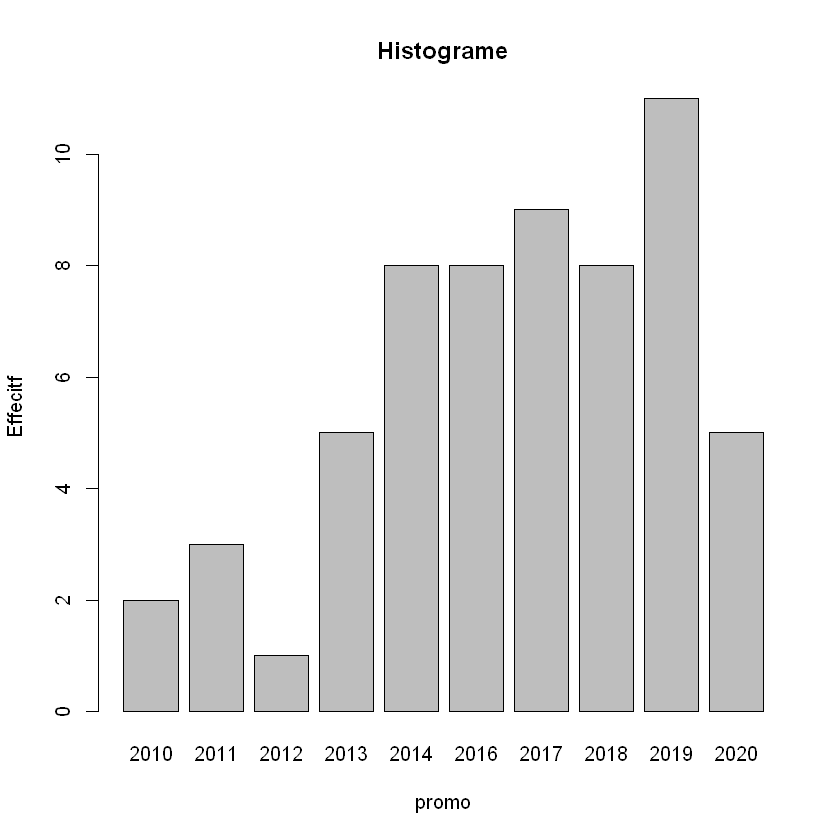

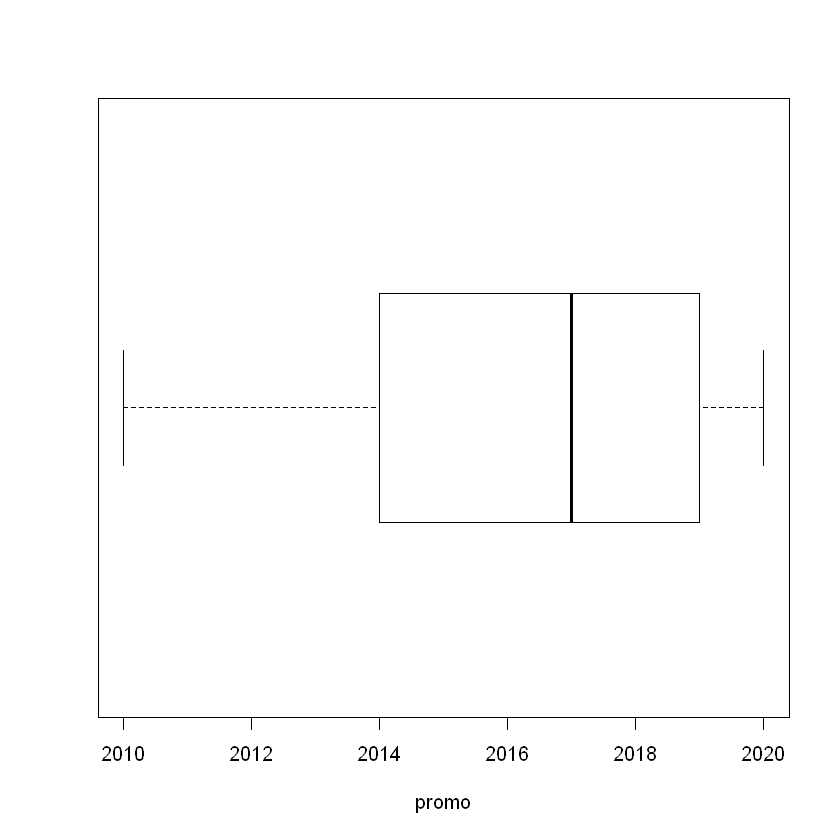

In [12]:
colonne <- 1
#tableColonne <- table(dataset2[,colonne])
#tableColonne
tableColonne <- as.factor(dataset2[,colonne])
#summary(tableColonne)
plot(tableColonne,
    , main = "Histograme"
    , xlab = names(dataset2)[colonne]
    , ylab = "Effecitf"
    )
boxplot(dataset2[,colonne], xlab = names(dataset2)[colonne], horizontal = TRUE)
#hist(dataset2[,colonne],main = )

On observe une forte propotion de personne avec peut experience de travaille par raport effectife de promotion eyant repondu au sondage.  
Il sont en general satisfait de leur travaille se qui pourais explique le peut de changement d'entreprise.  

On remarque aussi des points extremes en `chang` & `salaire`

In [13]:
colonne <- 9
Q1 <- quantile(
    x = dataset2[colonne]
    , prob = .25 
    , na.rm = TRUE
    )
Q3 <- quantile(
    x = dataset2[colonne]
    , prob = .75 
    , na.rm = TRUE
    )
QI <- as.numeric(Q3 - Q1)
QIR <- as.numeric(c(
    Q1 - 1.5 * QI
    , Q3 + 1.5 * QI
    ))
dataset2[dataset2[colonne] < QIR[1] & !is.na(dataset2[colonne]),]
dataset2[dataset2[colonne] > QIR[2] & !is.na(dataset2[colonne]),]

promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids


,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
5,2018,B,TB,CPL,3.0,2,CDI,[250;4999],84000,Hors_UE,OUI,H,Non,24,169,57
28,2017,B,AB,CPS,4.0,1,CDI,[250;4999],110000,Hors_UE,OUI,F,Non,28,167,72
29,2014,AB,Sans,DUT,6.0,4,CDI,[10;249],60000,Capital,OUI,F,Oui,30,182,68
38,2010,AB,AB,CPS,10.0,6,CDI,[5000;+],75000,Grande_ville,OUI,F,Oui,33,NA,NA
58,2013,B,B,Licence,7.5,1,CDI,[5000;+],73000,UE,OUI,H,Non,31,160,54


Il est ***difficile*** de déterminer si les valeurs du **salaire** sont aberrantes ou non, à partir des résultats obtenus.  
Pour la catégorie du **nombre de changements d'entreprise**, elles semblent plutôt ***cohérentes*** dans la globalité.  
Aucune modification ne sera opérée, on les gardera à l'esprit.

### Dépendence

In [14]:
t.test(x=dataset2["taille"],y=dataset2["poids"],conf.level = 0.99)
#graphique(x = dataset2["taille"],y = dataset2["poids"])

t.test(x=dataset2["promo"],y=dataset2["exp"],conf.level = 0.99)
#graphique(x = dataset2[14],y = dataset2[6])

t.test(x=dataset2["exp"],y=dataset2["chang"],conf.level = 0.99)
#graphique(x = dataset2[5],y = dataset2[6])

t.test(x=dataset2["age"],y=dataset2["chang"],conf.level = 0.99)
#graphique(x = dataset2[14],y = dataset2[6])

#table(dataset2[,"employers"],dataset2[,"lieu"])
t.test(table(dataset2[,"employers"],dataset2[,"lieu"]),conf.level = 0.99)
#graphique(x = dataset2[,10],y = dataset2[,8])


	Welch Two Sample t-test

data:  dataset2["taille"] and dataset2["poids"]
t = 43.192, df = 95.26, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
  97.04314 109.61934
sample estimates:
mean of x mean of y 
171.44444  68.11321 



	Welch Two Sample t-test

data:  dataset2["promo"] and dataset2["exp"]
t = 4146.4, df = 116.98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 2011.054 2013.596
sample estimates:
  mean of x   mean of y 
2016.266667    3.941667 



	Welch Two Sample t-test

data:  dataset2["exp"] and dataset2["chang"]
t = 4.1147, df = 99.774, p-value = 7.986e-05
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 0.5758686 2.6074647
sample estimates:
mean of x mean of y 
 3.941667  2.350000 



	Welch Two Sample t-test

data:  dataset2["age"] and dataset2["chang"]
t = 56.11, df = 88.49, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 24.08121 26.45212
sample estimates:
mean of x mean of y 
 27.61667   2.35000 



	One Sample t-test

data:  table(dataset2[, "employers"], dataset2[, "lieu"])
t = 4.3589, df = 19, p-value = 0.0003379
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 1.03097 4.96903
sample estimates:
mean of x 
        3 


In [15]:
dataset3 <- cbind(dataset2, dataset2["taille"] / dataset2["poids"])
colnames(dataset3)[length(dataset3)] <- "taille/poids"

dataset3 <- cbind(dataset3, dataset3["exp"] / (2021-dataset3["promo"]))
colnames(dataset3)[length(dataset3)] <- "exp/promo"

dataset3 <- cbind(dataset3, dataset3["exp"] / dataset3["chang"])
colnames(dataset3)[length(dataset3)] <- "exp/chang"

In [16]:
#table(dataset2[,"sexe"],dataset2[,"taille/poids"])
t.test(table(dataset3[,"sexe"],dataset3[,"taille/poids"]),conf.level = 0.99)
#graphique(x = dataset2[,"sexe"],y = dataset2[,"taille/poids"])


	One Sample t-test

data:  table(dataset3[, "sexe"], dataset3[, "taille/poids"])
t = 10.166, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 0.3930692 0.6669308
sample estimates:
mean of x 
     0.53 


Certaines variables ne sont pas indépendantes entre elles, il serait préférable de faire un produit entre deux variables dépendantes entre elles.  
On constate ci-dessus, que se sont des ***variables dépendantes*** entre elles dans notre echantillon.  
Nous ne prendrons pas les nouvelles variables en rapport avec l'**âge** car elles sont ***difficiles*** à expliquer de manière objective.  
La nouvelle variable qui dépend de l'emplacement et de la taille de l'**entreprise** est plus ***complexe*** à définir.

Explication des nouvelles variables :
- **taille/poids**  : le poids est proportionnel à la taille.
- **exp/promo** : l'experience realiser sur le nombre d'experience possible
- **exp/chang** : c'est la moyenne d'années accordées à chaque employeur.

## Régression

### Représentation


Call:
lm(formula = data[, Y] ~ data[, colonne])

Residuals:
   Min     1Q Median     3Q    Max 
-16928  -8728  -2768   3397  66032 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)        22689       8223   2.759  0.00774 **
data[, colonne]    21279       9493   2.241  0.02884 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14190 on 58 degrees of freedom
Multiple R-squared:  0.07972,	Adjusted R-squared:  0.06385 
F-statistic: 5.024 on 1 and 58 DF,  p-value: 0.02884



BIC :  1327.7716999259

p-value :  0.0288361069677225



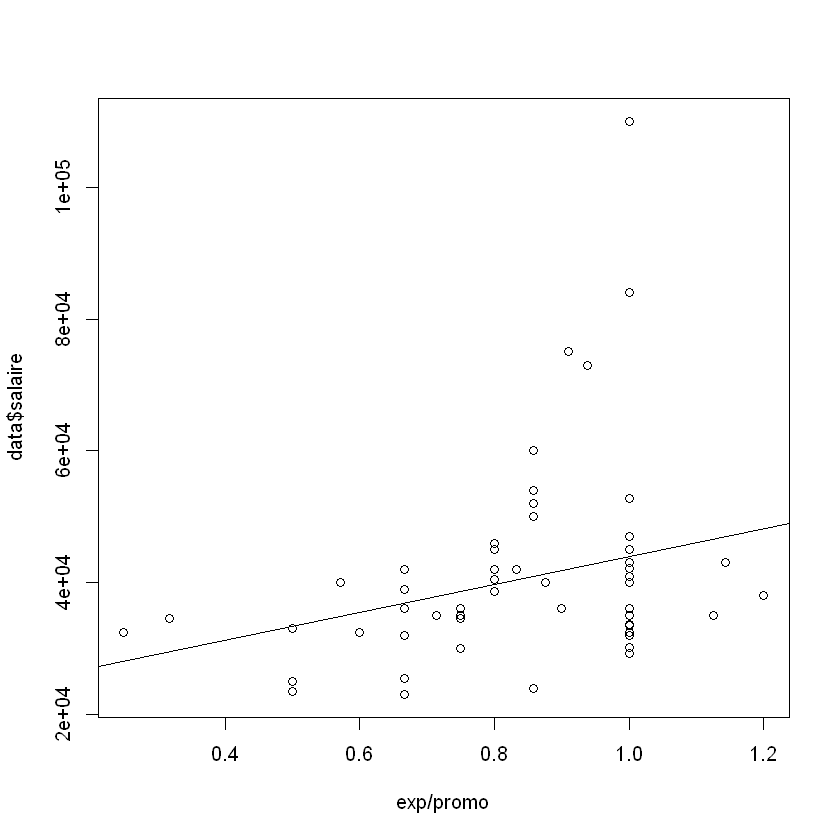

In [17]:
afficheModel(data = dataset3, colonne = 18)

Pour la version en ligne, vous pouvez ***défiler*** les différents graphiques en modifiant la variable `colonne` de la fonction ci-dessous.

Au cours du défilement, nous n'avons pas constaté de modification à effectuer sur des variables par une ***fonction***.  
Nous avons cependant bien sûr constaté que, comparativement à une interprétation humaine, les droites de régression ne sont toujours ***pas suffisamment inclinées***, due aux points extrêmes laissés.  
Nous envisagerons de les ***conserver*** afin d'obtenir un modèle plus robuste et que dans leur globalité et ses valeurs ne sont pas aussi aberrantes.

### Distribution

Lors de notre première régression, nous avions omis de distribuer les catégories des colonnes.  
Cela signifie que chaque catégorie des colonnes non continues (caractère) sera ***distribuée*** en autant de colonnes binaires.
Nous avons observé que les résultats de régression pour la même valeur d'interception étaient différents.  
Nous sélectionnerons la colonne de référence à la fin.

In [18]:
categorie <- function(
    data
    , colonne
    , exept
    ) {
        vectorNull <- as.numeric(rep(0, nrow(data)))
        if (missing(exept)) {exept <- ""}
        #print(data[colonne])
        listeUnique <- distinct(data[,colonne])
        #print(listeUnique)
        dataNew <- data
        for (index in seq(length(listeUnique))) {
            dataNew <- cbind(
                dataNew
                , if (listeUnique[index] == exept) {vectorNull} else {
                    as.numeric(replacElement(
                        listeData = data[,colonne]
                        , listeModif = vectorNull
                        , element = listeUnique[index]
                        , ramplace = 1
                        ))
                    }
                )
            colnames(dataNew)[length(dataNew)] <- paste( # modifier le nom de la colonne
                names(data)[colonne]
                , listeUnique[index]
                , sep = "" # separation
                )
            }
        return(dataNew)
        }
dataset4 <- categorie(data = dataset3, colonne = 2)#, exept = "AB")
#regression(affiche = TRUE, data = dataset2, element = c(2))
#regression(affiche = TRUE, data = dataset3, element = c(17,18,19,20))
for (index in indexChar[-1]) {
    dataset4 <- categorie(data = dataset4, colonne = index)
    }
tail(dataset4)
indexEcole <- c(20,21,22,23)
indexBac <- c(24,25,26,27)
indexEtudes <- c(28,29,30,31,32)
indexContrat <- c(33,34)
indexEmployers <- c(35,36,37,38)
indexLieu <- c(39,40,41,42,43)
indexHeureu <- c(44,45)
indexSexe <- c(46,47)
indexEnfants <- c(48,49)

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,...,lieuCapital,lieuGrande_ville,lieuHors_UE,lieuUE,heureuNON,heureuOUI,sexeF,sexeH,enfantsNon,enfantsOui
60,2019,B,TB,CPS,2.0,2,CDI,[10;249],32000,Autre_ville,...,0,0,0,0,0,1,0,1,1,0
61,2019,AB,AB,CPS,2.0,1,CDI,[10;249],40000,Capital,...,1,0,0,0,0,1,0,1,1,0
62,2013,B,Sans,Licence,7.0,2,CDI,[5000;+],40000,Capital,...,1,0,0,0,0,1,1,0,1,0
63,2019,B,TB,CPS,1.0,1,CDI,[5000;+],33000,Grande_ville,...,0,1,0,0,0,1,1,0,1,0
64,2010,B,B,CPS,3.5,4,CDD,[10;249],34560,Capital,...,1,0,0,0,0,1,1,0,1,0
65,2016,B,Sans,Licence,3.0,2,CDI,[0;10],32500,Grande_ville,...,0,1,0,0,0,1,0,1,0,1


In [19]:
regression(affiche = TRUE, data = dataset4, element = c(2))
#regression(affiche = TRUE, data = dataset4, element = c(21,22,23,24))
regression(affiche = TRUE, data = dataset4, element = c(17,22,23,24))#,21
#regression(affiche = TRUE, data = dataset4, element = c(21,22,24))#,23


Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
   Min     1Q Median     3Q    Max 
-18070  -8026  -5070    824  68930 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             41493.2     4489.6   9.242 4.69e-12 ***
data...element.1..B      -422.8     5348.8  -0.079    0.937    
data...element.1..Sans   -493.2    10368.3  -0.048    0.962    
data...element.1..TB    -4493.2    10368.3  -0.433    0.667    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16190 on 46 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.00422,	Adjusted R-squared:  -0.06072 
F-statistic: 0.06498 on 3 and 46 DF,  p-value: 0.9781



[1] "1126.4846168112"                                                                                                 
[2] "0.97813059622011"                                                                                                
[3] "Y= 41493 +X_{ data...element.1..B }* -422 +X_{ data...element.1..Sans }* -493 +X_{ data...element.1..TB }* -4493"


Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
   Min     1Q Median     3Q    Max 
-19375  -6427  -3166   1296  67483 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         48939.2    12800.0   3.823 0.000379 ***
data...element.1..  -3199.7     4772.7  -0.670 0.505807    
ecoleSans            -565.2     9039.5  -0.063 0.950403    
ecoleTB             -3150.7     9113.6  -0.346 0.731067    
bacAB                 998.9     4668.0   0.214 0.831456    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15090 on 48 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.01445,	Adjusted R-squared:  -0.06768 
F-statistic: 0.1759 on 4 and 48 DF,  p-value: 0.9497



[1] "1188.92143631511"                                                                                        
[2] "0.94971283050247"                                                                                        
[3] "Y= 48939 +X_{ data...element.1.. }* -3199 +X_{ ecoleSans }* -565 +X_{ ecoleTB }* -3150 +X_{ bacAB }* 998"

In [20]:
choix <- c('lieuGrande_ville','lieuCapital','lieuUE','lieuHors_UE') #'lieuAutre_ville', | coefficient "croissant" | p-value=0% & R²=60% & BIC=1289
choix <- c('contratCDI') #'contratCDD', | coefficient positive | p-value=0% & R²=15% & BIC=1322
choix <- c('promo/exp') # coefficient negative | p-value=0% & R²=14% & BIC=1323
choix <- c('age') # coefficient positive | p-value=5% & R²=6% & BIC=1328
choix <- c('enfantsOui') #'enfantsNon', | coefficient positive | p-value=10% & R²=4% & BIC=1329
choix <- c('heureuOUI') #'heureuNON', | coefficient positive | p-value=43% & R²=1% & BIC=1332
choix <- c('exp/chang') # coefficient negative | p-value=44% & R²=7% & BIC=1328
choix <- c('employers[10;249]','employers[250;4999]','employers[5000;+]') #'employers[0;10]', | coefficient croissant | p-value=44% & R²=5% & BIC=1338
choix <- c('sexeF') #,'sexeH' | coefficient positive | p-value=44% & R²=1% & BIC=1332
choix <- c('taille/poids') # coefficient negative | p-value=47% & R²=1% & BIC=1177
choix <- c('bacAB','bacB','bacTB') #,'bacSans' | coefficient ... | p-value=78% & R²=2% & BIC=1339
choix <- c('ecoleAB','ecoleB','ecoleTB') #,'ecoleSans' | coefficient ... | p-value=96% & R²=0% & BIC=1340
choix <- c('etudesBTS','etudesDUT','etudesCPL','etudesCPS') #,'etudesLicence' | coefficient ... | p-value=100% & R²=0% & BIC=1344
regression(affiche = TRUE, data = dataset4, element = choix)


Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
   Min     1Q Median     3Q    Max 
-17414  -7415  -4165   1836  69586 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         40800.9     4053.1  10.067  4.4e-14 ***
data...element.1..  -4800.9    15697.5  -0.306    0.761    
etudesDUT            1116.3     6110.2   0.183    0.856    
etudesCPL            -884.2     7399.9  -0.119    0.905    
etudesCPS            -387.1     4964.0  -0.078    0.938    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15170 on 55 degrees of freedom
Multiple R-squared:  0.003497,	Adjusted R-squared:  -0.06898 
F-statistic: 0.04826 on 4 and 55 DF,  p-value: 0.9955



[1] "1344.8291278521"                                                                                               
[2] "0.995493617545571"                                                                                             
[3] "Y= 40800 +X_{ data...element.1.. }* -4800 +X_{ etudesDUT }* 1116 +X_{ etudesCPL }* -884 +X_{ etudesCPS }* -387"

Quelques remarques sur les coefficients des régressions :

1. **Année de promotion** : diminue avec le temps, alors la valeur de la monnaie augmente de 2 % par an. Rappelons que l'effectif entre 2010 et 2013 est faible.
2. **mention à l'école** : les ***coefficients sont incohérents*** (une personne avec la mention très bien serait moins bien payé qu'une personne sans mention) car ils ne sont pas assez nombreux pour représenter cette catégorie.
2. **Mention au bac** : les ***coefficients sont incohérents***.
3. **Étude supérieure** : les ***coefficients sont incohérents***.
4. **Lieu de travail** : un ingénieur serait mieux payé dans des petites et moyennes villes que dans des grandes villes de France. Rappelons que cette variable est corrélée avec la **taille de l'entreprise**.
5. **Contrat** : on peut être embauché en CDD pour des ***missions spécifiques*** et être embauché plus cher.
6. **taille/poids** : on peut se demander si ce n'est pas cette proportion qui est prise de façon subjective.
7. **Année de promotion** : lien négatif qui peut s'expliquer par le nombre d'années ***d'expérience***.
8. **promo/exp** : plus on sort taux plus on a le temps d'avoir de l'expérience.

### Comparaison

**Aplication d'un cas particulier** :  
Soit un jeunne ingegnieur cognicient, homme de corpulence moyenne de 25ans qui à optenu sont duplomme en 2020 avec 1an d'experience et sans enfant,
heureux dans une entreprise entre 10 et 249 employers se situant dans une grande ville qui là embaucher en CDI.

In [21]:
choix <- c() #
choix <- c(choix,'lieuGrande_ville','lieuCapital','lieuUE','lieuHors_UE') #'lieuAutre_ville',
choix <- c(choix,'contratCDI') #'contratCDD',
choix <- c(choix,'exp/promo')
choix <- c(choix,'age')
choix <- c(choix,'enfantsOui') #'enfantsNon',
choix <- c(choix,'heureuOUI') #'heureuNON',
choix <- c(choix,'exp/chang')
choix <- c(choix,'employers[10;249]','employers[250;4999]','employers[5000;+]') #'employers[0;10]',
choix <- c(choix,'sexeF') #,'sexeH'
choix <- c(choix,'taille/poids')
result1 <- regression(affiche = TRUE, data = dataset4, element = choix) # coefficient ... | p-value=0% & Adjusted_R²=86% & BIC=1107
message(paste('BIC : ', result1[1]))
message(paste('Polynome : ', result1[3]))
cas1 <- 5803.14303602956 -2279 +7853 +3294 +25* 950 +-108 +4461+2.6* -3018
message(paste('Resultat cas particulier : ', cas1))
message(paste('corpulence moyenne : ',mean(dataset4[,'taille/poids'],na.rm = TRUE)))


Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
   Min     1Q Median     3Q    Max 
 -9818  -3220      0   2192   9818 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5803.1    11487.3   0.505  0.61643    
data...element.1..     -2279.3     1931.3  -1.180  0.24545    
lieuCapital             4488.1     2242.9   2.001  0.05276 .  
lieuUE                 36360.3     6277.2   5.792 1.20e-06 ***
lieuHors_UE            60810.0     4618.2  13.167 1.55e-15 ***
contratCDI              7853.5     2285.4   3.436  0.00147 ** 
`exp/promo`             3294.7     5050.9   0.652  0.51824    
age                      950.8      312.3   3.044  0.00428 ** 
enfantsOui              5160.4     2816.9   1.832  0.07502 .  
heureuOUI               -108.7     3808.2  -0.029  0.97739    
`exp/chang`             -621.9      548.1  -1.135  0.26383    
`employers[10;249]`     4461.3     3271.3   1.364  0.18088    
`employers[250;4999]`   32

BIC :  1106.78067882468

Polynome :  Y= 5803 +X_{ data...element.1.. }* -2279 +X_{ lieuCapital }* 4488 +X_{ lieuUE }* 36360 +X_{ lieuHors_UE }* 60810 +X_{ contratCDI }* 7853 +X_{ `exp/promo` }* 3294 +X_{ age }* 950 +X_{ enfantsOui }* 5160 +X_{ heureuOUI }* -108 +X_{ `exp/chang` }* -621 +X_{ `employers[10;249]` }* 4461 +X_{ `employers[250;4999]` }* 3228 +X_{ `employers[5000;+]` }* 4137 +X_{ sexeF }* 2168 +X_{ `taille/poids` }* -3018

Resultat cas particulier :  34927.3430360296

corpulence moyenne :  2.60455970596832



Seules les variables `age`,  `contrat` et `enfantOUI` gardent leur p-value inférieure ou proche de 5 %.

In [24]:
nonSelect <- c('exp','chang','taille','poids','ecole','bac','etudes','promo')
choix <- c() #
choix <- c(choix,'lieu') # p-vale=0% & BIC=1289
choix <- c(choix,'taille/poids') # p-vale=0% & BIC=1111
choix <- c(choix,'age') # p-vale=0% & BIC=1098
choix <- c(choix,'contrat') # p-vale=0% & BIC=1084
result <- afficheRegression(data = dataset3, colonnes = choix, eliminer = nonSelect)
result[order(result$Pvalue),]
choix <- c() #
choix <- c(choix,'lieuGrande_ville','lieuCapital','lieuUE','lieuHors_UE') # p-vale=0% & BIC=1289
choix <- c(choix,'taille/poids') # p-vale=0% & BIC=1111
choix <- c(choix,'age') # p-vale=0% & BIC=1098
choix <- c(choix,'contratCDI') # p-vale=0% & BIC=1084
result2 <- regression(affiche = TRUE, data = dataset4, element = choix)
message(paste('BIC : ', result2[1]))
message(paste('Polynome : ', result2[3]))
cas2 <- 12841 -2260+ 59871 +2.6* -4677 +25* 1098 +8089
message(paste('Resultat cas particulier : ', cas2))
message(paste('Diference des cas : ', cas2 - cas1))
message(paste('Diference des BIC : ', as.numeric(result2[1]) - as.numeric(result1[1])))

,index,nam,BIC,Pvalue,prod,ordreBIC,ordrePvalue,ordreProd,prodOrdre
4,13,enfants,1085.664,4.060838e-19,4.408707e-16,1,1,1,1
3,12,sexe,1086.587,5.920543e-19,6.433183e-16,2,2,2,4
5,18,exp/promo,1087.649,9.137364e-19,9.938242e-16,3,3,3,9
2,11,heureu,1088.059,1.080345e-18,1.175478e-15,4,4,4,16
6,19,exp/chang,1088.066,1.083747e-18,1.179189e-15,5,5,5,25
1,8,employers,1093.620,1.945405e-17,2.127534e-14,6,6,6,36



Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
     Min       1Q   Median       3Q      Max 
-11947.4  -2598.9   -161.6   2076.7  13175.6 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         12842.0     8477.3   1.515  0.13680    
data...element.1..  -2260.4     1763.2  -1.282  0.20642    
lieuCapital          5463.0     1989.5   2.746  0.00864 ** 
lieuUE              31880.4     5459.7   5.839 5.41e-07 ***
lieuHors_UE         59871.5     3949.7  15.159  < 2e-16 ***
`taille/poids`      -4677.8     1677.2  -2.789  0.00772 ** 
age                  1098.3      246.1   4.463 5.36e-05 ***
contratCDI           8089.5     1895.2   4.269  0.00010 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5185 on 45 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.891,	Adjusted R-squared:  0.874 
F-statistic: 52.54 on 7 and 45 DF,  p-value: < 2.2e-16



BIC :  1084.14658327282

Polynome :  Y= 12841 +X_{ data...element.1.. }* -2260 +X_{ lieuCapital }* 5463 +X_{ lieuUE }* 31880 +X_{ lieuHors_UE }* 59871 +X_{ `taille/poids` }* -4677 +X_{ age }* 1098 +X_{ contratCDI }* 8089

Resultat cas particulier :  93830.8

Diference des cas :  58903.4569639704

Diference des BIC :  -22.6340955518601



Nous utilisons ici la méthode ascendante avec le critère BIC en prenant à chaque fois la p-value la plus faible.  
Les p-value des coefficients restent pour la plupart très faibles, mais on conjserve un ***BIC proche*** du précédent.

## Conclusion

L'ensemble des données de base ont été ***nettoyées*** (*des erreurs sûrement dues à des problèmes de somnolence ou de bizutage*), pour obtenir un environnement de travail correct.  
À partir de cette nouvelle table, nous avons réalisé des ***visualisations*** de chaque VE (variable explicative), qui permet de faire une première analyse de leur comportement dans lequel nous avons remarqué de possibles corrélations et des points extrêmes.  
Avec cette phase de travail, nous avons procédé à des tests de ***corrélation*** entre les VE pour vérifier la véracité des remarques évoquées précédemment.  
Ensuite, nous avons visualisé les différentes régressions simples pour faire une première sélection des VE et de ***comprendre*** leur comportement.
Pour clore, nous déterminons les VE les plus ***pertinentes*** par une méthode conventionnelle.

Depuis 2003, ENISC forme des ingénieurs en cognatique.
Uniquement 65 personnes diplômées de 2010 à 2020 ont répondu au sondage.  
En dépit de son ***échantillon faible***, elle doit être considérée comme représentative de cette population.  
Comme l'a montré une autre étude, la population répondant le plus au sondage sont des statisticiens, imaginez donc quelle serait la proportion de réponse au sondage si ce n'était pas à ces personnes.

Il faudrait vérifier s'il existe une véritable dépendance entre les variables `lieu` et `employers` dans une autre étude grâce à "opendata.gouv".  
Il serait pertinent de comparer le polynôme trouvé avec un ingénieur, peu importe sa spécialité, afin de déterminer si ces ***critères sont inhérents*** à ce secteur.